# Song Recommendation using Natural Language Processing

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
songs = pd.read_csv('Datasets/spotify_millsongdata.csv')

In [67]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [68]:
songs = songs.sample(n=10000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [69]:
songs.head()

,artist,song,text
0,Bruce Springsteen,Bobby Jean,"Well I came by your house the other day, your ..."
1,Enya,Marble Halls,I dreamt I dwelt in marble halls \rWith vassa...
2,Amy Grant,That's What Love Is For,Sometimes we make it harder than it is \rWe'l...
3,Cat Stevens,Two Fine People,Now that I've passed your test \rHow can I pr...
4,Justin Bieber,Sorry,[Verse 1] \rYou gotta go and get angry at all...


In [70]:
text_input = """Wise men say
Only fools rush in
But I can't help falling in love with you
Shall I stay?
Would it be a sin
If I can't help falling in love with you?
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
For I can't help falling in love with you"""

In [71]:
songs2: pd.DataFrame = songs.append(songs.iloc[0])
songs2.loc[songs2.index[-1], 'text'] = text_input
songs2.loc[songs2.index[-1], 'song'] = "Input_Song"
songs2.loc[songs2.index[-1], 'artist'] = "Input_artist"
songs2

C:\Users\Shrirang\AppData\Local\Temp\ipykernel_1752\2059816204.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  songs2: pd.DataFrame = songs.append(songs.iloc[0])


,artist,song,text
0,Input_artist,Input_Song,Wise men say\nOnly fools rush in\nBut I can't ...
1,Enya,Marble Halls,I dreamt I dwelt in marble halls \rWith vassa...
2,Amy Grant,That's What Love Is For,Sometimes we make it harder than it is \rWe'l...
3,Cat Stevens,Two Fine People,Now that I've passed your test \rHow can I pr...
4,Justin Bieber,Sorry,[Verse 1] \rYou gotta go and get angry at all...
...,...,...,...
9996,Dean Martin,I'm So Lonesome I Could Cry,Hear that lonesome whippoorwill \rHe sounds t...
9997,Cheap Trick,This Time Around,Never look back but now never lose sight \rOf...
9998,Beach Boys,Getcha Back,Bow bow bow bow oop \rAhh ooo oohh waaa oooo ...
9999,Natalie Grant,Always Be Your Baby,You were my first love \rAlways there for me ...


In [72]:
documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)
print(lyrics_matrix, lyrics_matrix.shape)

  (0, 17462)	0.0808216555348014
  (0, 12350)	0.043617506231320304
  (0, 2030)	0.04056290919939671
  (0, 18866)	0.06687112135283173
  (0, 18739)	0.0447788475270398
  (0, 4972)	0.05641099991872936
  (0, 30169)	0.03214409807824107
  (0, 4385)	0.07381485615391851
  (0, 18688)	0.07594466205631023
  (0, 29938)	0.06687112135283173
  (0, 16229)	0.027562170634611426
  (0, 27563)	0.05665066171373596
  (0, 26825)	0.05940640980745524
  (0, 13351)	0.046911659420754766
  (0, 22254)	0.07291283746994455
  (0, 23499)	0.0808216555348014
  (0, 29903)	0.14144509176517442
  (0, 24925)	0.06390716927095627
  (0, 19233)	0.114518463722288
  (0, 30675)	0.09975623078395386
  (0, 30579)	0.07594466205631023
  (0, 4201)	0.0927720633355591
  (0, 24765)	0.06162981569488812
  (0, 17171)	0.09175720583579483
  (0, 18231)	0.058244780187964015
  :	:
  (9999, 18190)	0.25764938626989264
  (9999, 12123)	0.19745650281738472
  (9999, 33195)	0.25430880496947583
  (9999, 29375)	0.28074931373402556
  (9999, 27253)	0.0778744482708

In [73]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = songs[0:10]['song']
  df.index = songs[0:10]['song']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

In [74]:
cosine_similarities = cosine_similarity(lyrics_matrix)
print(cosine_similarities)

[[1.         0.00288498 0.0149212  ... 0.01546873 0.00848013 0.0645249 ]
 [0.00288498 1.         0.         ... 0.         0.         0.17743235]
 [0.0149212  0.         1.         ... 0.01040232 0.0169952  0.11821005]
 ...
 [0.01546873 0.         0.01040232 ... 1.         0.00981942 0.02228829]
 [0.00848013 0.         0.0169952  ... 0.00981942 1.         0.02510795]
 [0.0645249  0.17743235 0.11821005 ... 0.02228829 0.02510795 1.        ]]


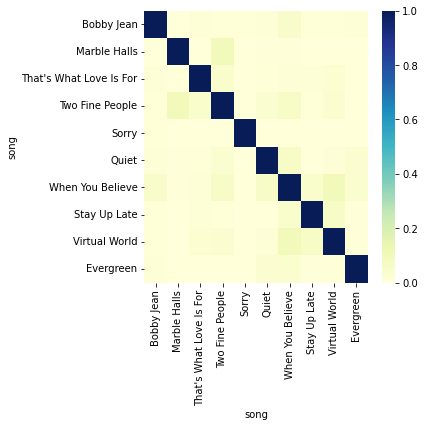

In [75]:
create_heatmap(similarity= cosine_similarities[-11:-1, -11:-1])

In [76]:
similarities = {}

for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [77]:
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round((1 - recom_song[i][0]), 4)} similarity score")
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [78]:
recommedations = Recommender(similarities)

In [79]:
recommendation2 = {
    "song": songs['song'].iloc[-1],
    "number_songs": 5
}
recommedations.recommend(recommendation2)

The 5 recommended songs are:
Number 1:
Out Of Time by Ramones with 0.695 similarity score
--------------------
Number 2:
Girl, You'll Be A Woman Soon by Neil Diamond with 0.6951 similarity score
--------------------
Number 3:
I Have Always Loved You by Enrique Iglesias with 0.7014 similarity score
--------------------
Number 4:
I Would Do Anything by Kenny Loggins with 0.7134 similarity score
--------------------
Number 5:
Is You Is Or Is You Ain't (My Baby)? by Bing Crosby with 0.7145 similarity score
--------------------
